In [5]:
import numpy as np # linear algebra
import pandas as pd
import os

In [6]:
df =  pd.read_csv("/content/breast_cancer_survival.csv")
df.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,FEMALE,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,26-Aug-18,Alive
1,54,FEMALE,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,25-Jan-19,Dead
2,63,FEMALE,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,24-Aug-18,08-Apr-20,Alive
3,78,FEMALE,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,16-Nov-18,28-Jul-20,Alive
4,42,FEMALE,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,12-Dec-18,05-Jan-19,Alive


In [7]:
df.shape

(334, 15)

<Axes: >

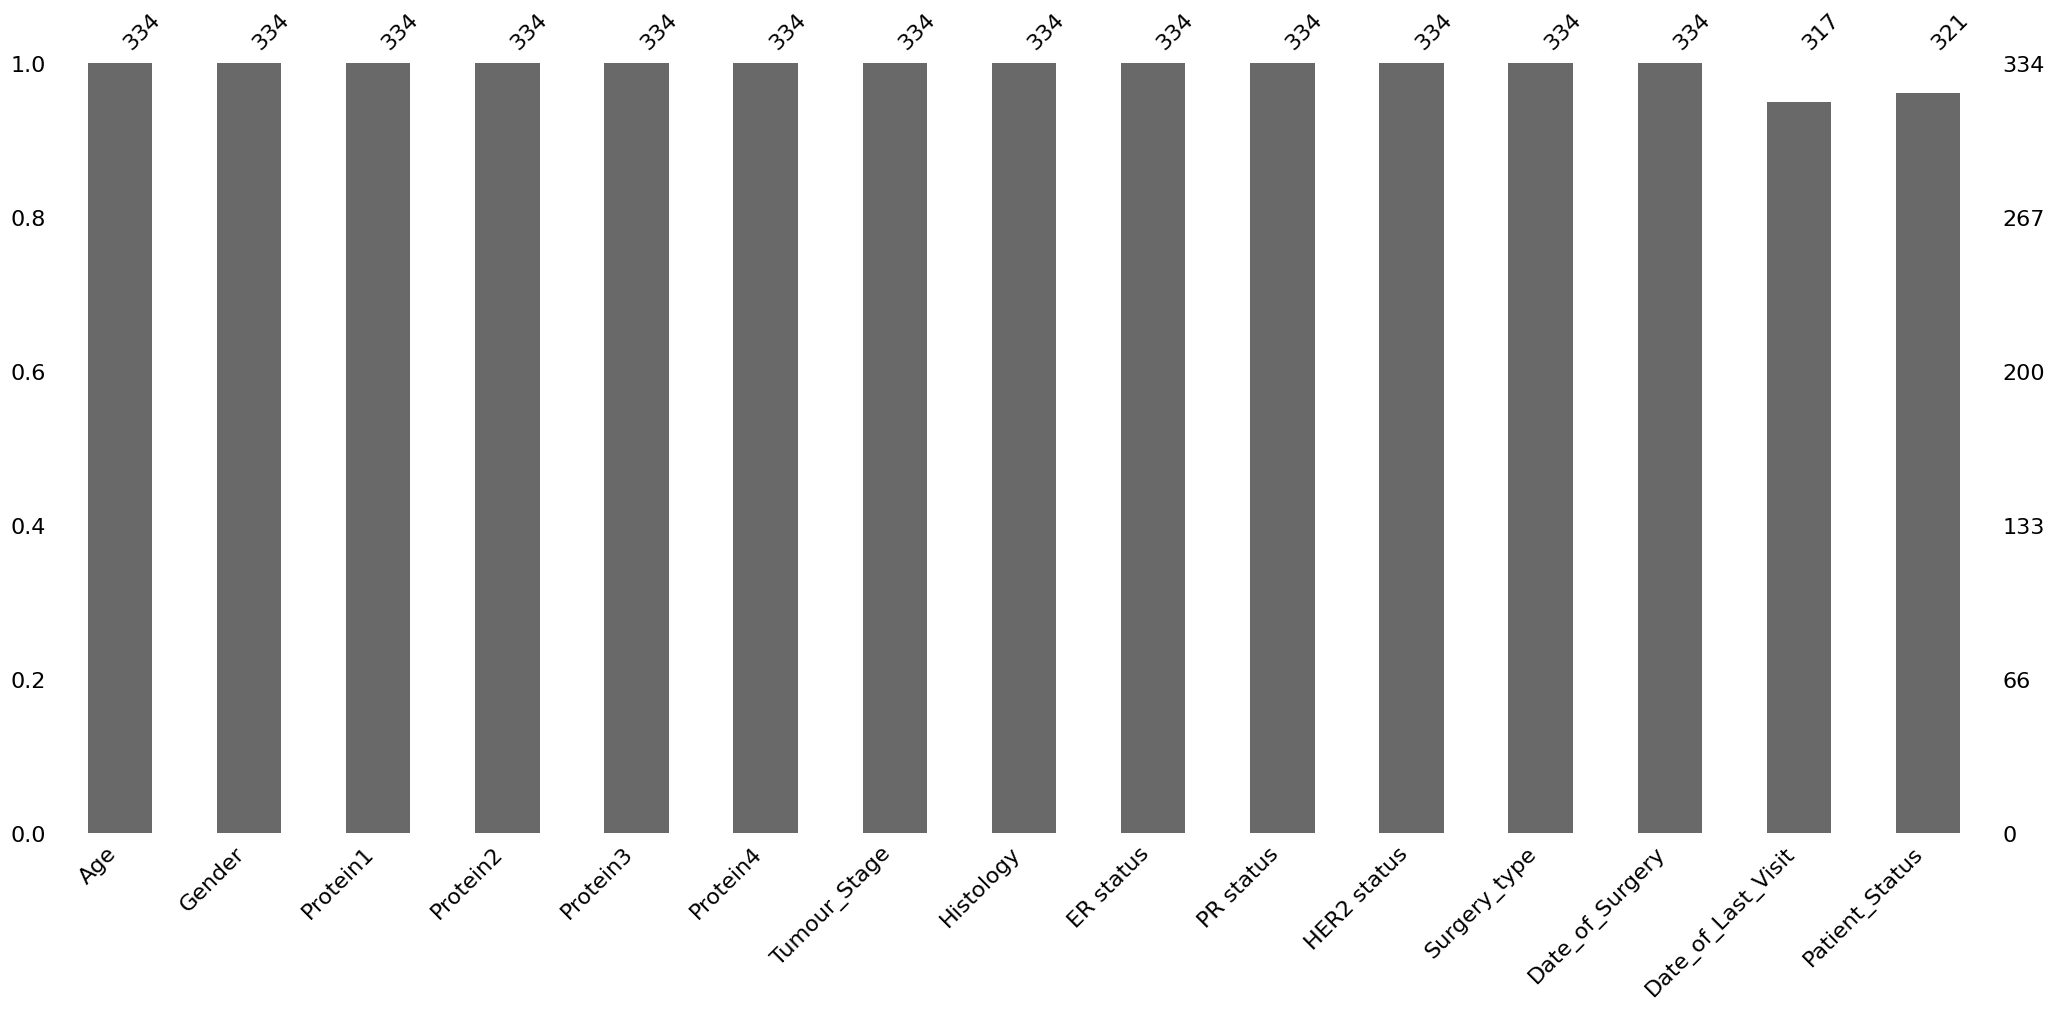

In [8]:
import missingno

missingno.bar(df)

In [9]:
df = df.dropna(how="any")

In [10]:
df.shape

(317, 15)

<Axes: ylabel='count'>

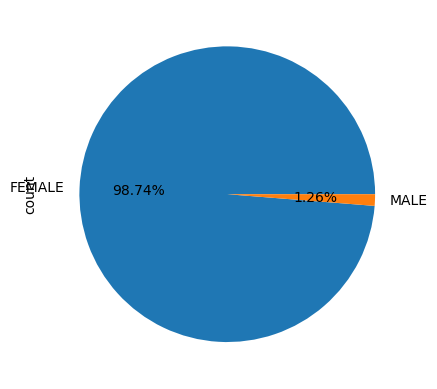

In [11]:
df["Gender"].value_counts().plot(kind="pie", autopct="%.2f%%")

<Axes: ylabel='count'>

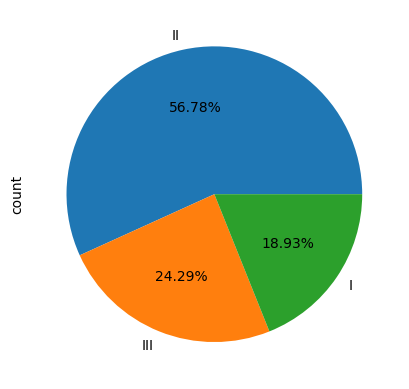

In [12]:
df["Tumour_Stage"].value_counts().plot(kind="pie", autopct="%.2f%%")

<Axes: ylabel='count'>

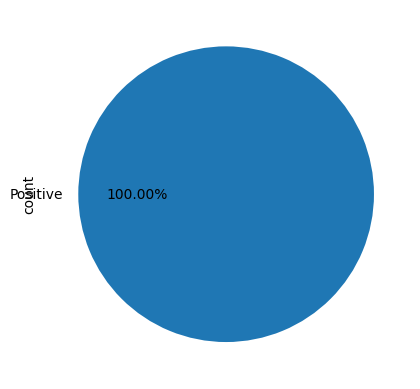

In [13]:
df["ER status"].value_counts().plot(kind="pie", autopct="%.2f%%")

<Axes: ylabel='count'>

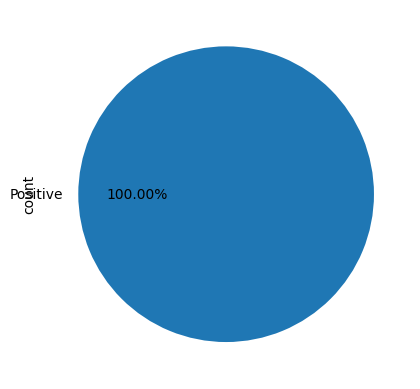

In [14]:
df["PR status"].value_counts().plot(kind="pie", autopct="%.2f%%")

<Axes: ylabel='count'>

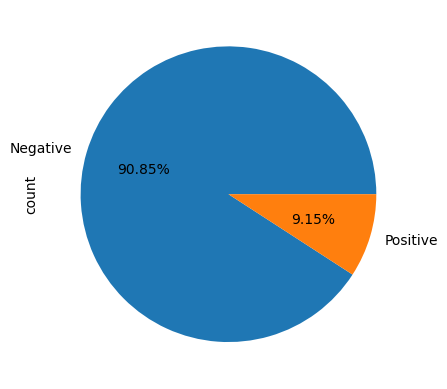

In [15]:
df["HER2 status"].value_counts().plot(kind="pie", autopct="%.2f%%")

<Axes: ylabel='count'>

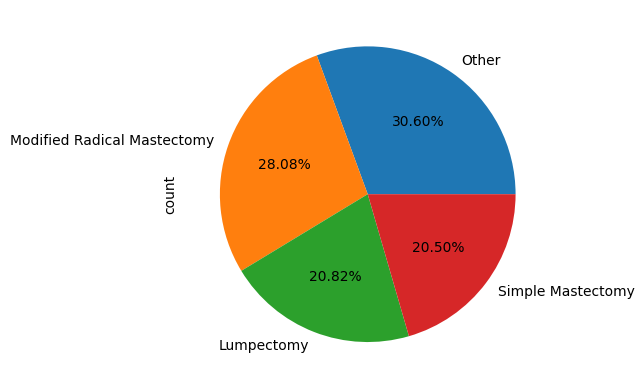

In [16]:
df["Surgery_type"].value_counts().plot(kind="pie", autopct="%.2f%%")

<Axes: ylabel='count'>

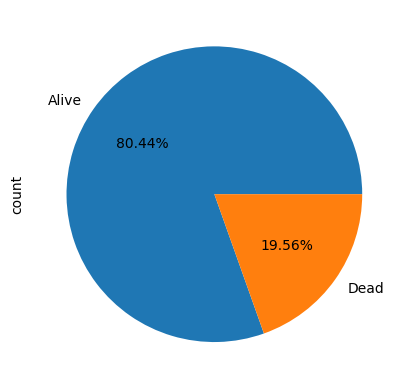

In [17]:
df["Patient_Status"].value_counts().plot(kind="pie", autopct="%.2f%%")

<Axes: xlabel='Age', ylabel='HER2 status'>

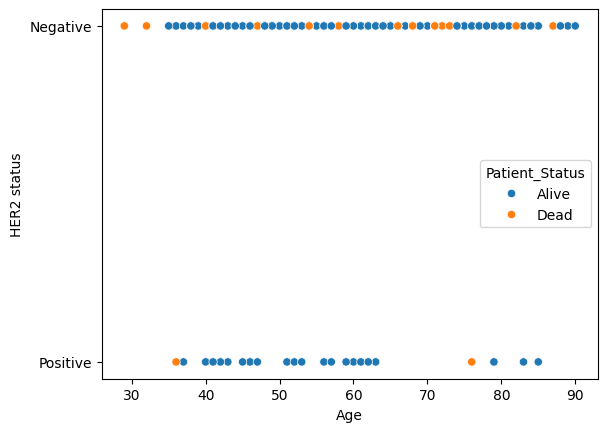

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=df, x="Age", y="HER2 status", hue="Patient_Status")

<Axes: xlabel='Age', ylabel='Surgery_type'>

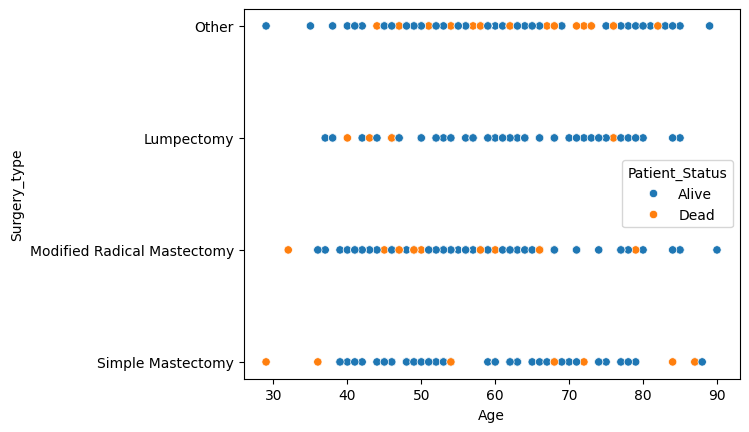

In [19]:
sns.scatterplot(data=df, x="Age", y="Surgery_type", hue="Patient_Status")

<Axes: xlabel='Age', ylabel='Density'>

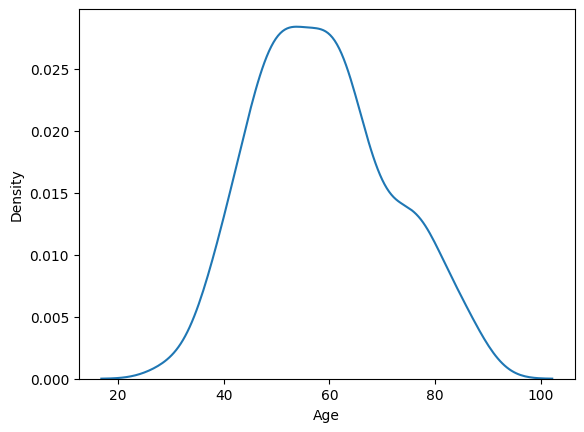

In [20]:
sns.kdeplot(data=df, x="Age")

In [21]:
df['Date_of_Surgery'] = pd.to_datetime(df['Date_of_Surgery']).apply(lambda x: int(x.timestamp()))
df['Date_of_Last_Visit'] = pd.to_datetime(df['Date_of_Last_Visit']).apply(lambda x: int(x.timestamp()))

<ipython-input-21-5be224a9ba68>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date_of_Surgery'] = pd.to_datetime(df['Date_of_Surgery']).apply(lambda x: int(x.timestamp()))
<ipython-input-21-5be224a9ba68>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date_of_Last_Visit'] = pd.to_datetime(df['Date_of_Last_Visit']).apply(lambda x: int(x.timestamp()))


In [22]:
df.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,FEMALE,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,1526774400,1535241600,Alive
1,54,FEMALE,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,1524700800,1548374400,Dead
2,63,FEMALE,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,1535068800,1586304000,Alive
3,78,FEMALE,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,1542326400,1595894400,Alive
4,42,FEMALE,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,1544572800,1546646400,Alive


In [23]:
df["Date_of_Surgery"] = df["Date_of_Surgery"].apply(pd.to_datetime)
df['Surgery_Day'] = df["Date_of_Surgery"].apply(pd.to_datetime).dt.day
df['Surgery_Month'] = df["Date_of_Surgery"].apply(pd.to_datetime).dt.month
df['Surgery_Year'] = df["Date_of_Surgery"].apply(pd.to_datetime).dt.year
df.drop('Date_of_Surgery', axis=1, inplace=True)

In [24]:
df["Date_of_Last_Visit"] = df["Date_of_Last_Visit"].apply(pd.to_datetime)
df['Last_Visit_Day'] = df["Date_of_Last_Visit"].apply(pd.to_datetime).dt.day
df['Last_Visit_Month'] = df["Date_of_Last_Visit"].apply(pd.to_datetime).dt.month
df['Last_Visit_Year'] = df["Date_of_Last_Visit"].apply(pd.to_datetime).dt.year
df.drop('Date_of_Last_Visit', axis=1, inplace=True)

In [25]:
genders = pd.get_dummies(df["Gender"])
genders.head()

,FEMALE,MALE
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False


In [26]:
df = pd.concat([genders, df], axis=1)
df.head()

,FEMALE,MALE,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,...,PR status,HER2 status,Surgery_type,Patient_Status,Surgery_Day,Surgery_Month,Surgery_Year,Last_Visit_Day,Last_Visit_Month,Last_Visit_Year
0,True,False,42,FEMALE,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,...,Positive,Negative,Other,Alive,1,1,1970,1,1,1970
1,True,False,54,FEMALE,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,...,Positive,Negative,Other,Dead,1,1,1970,1,1,1970
2,True,False,63,FEMALE,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,...,Positive,Negative,Lumpectomy,Alive,1,1,1970,1,1,1970
3,True,False,78,FEMALE,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,...,Positive,Negative,Other,Alive,1,1,1970,1,1,1970
4,True,False,42,FEMALE,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,...,Positive,Positive,Lumpectomy,Alive,1,1,1970,1,1,1970


In [27]:
df.drop(["PR status", "ER status"], axis=1, inplace=True)
df.head()

,FEMALE,MALE,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,Patient_Status,Surgery_Day,Surgery_Month,Surgery_Year,Last_Visit_Day,Last_Visit_Month,Last_Visit_Year
0,True,False,42,FEMALE,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Negative,Other,Alive,1,1,1970,1,1,1970
1,True,False,54,FEMALE,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Negative,Other,Dead,1,1,1970,1,1,1970
2,True,False,63,FEMALE,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Negative,Lumpectomy,Alive,1,1,1970,1,1,1970
3,True,False,78,FEMALE,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Negative,Other,Alive,1,1,1970,1,1,1970
4,True,False,42,FEMALE,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Lumpectomy,Alive,1,1,1970,1,1,1970


In [28]:
df.drop("Gender", axis=1, inplace=True)

In [29]:
from sklearn.preprocessing import LabelEncoder

def label_encoder(column):
    le = LabelEncoder().fit(column)
    print(column.name, le.classes_)
    return le.transform(column)

In [30]:
cols = ["Tumour_Stage", "Histology", "HER2 status", "Surgery_type", "Patient_Status"]

for col in cols:
    df[col] = label_encoder(df[col])

Tumour_Stage ['I' 'II' 'III']
Histology ['Infiltrating Ductal Carcinoma' 'Infiltrating Lobular Carcinoma'
 'Mucinous Carcinoma']
HER2 status ['Negative' 'Positive']
Surgery_type ['Lumpectomy' 'Modified Radical Mastectomy' 'Other' 'Simple Mastectomy']
Patient_Status ['Alive' 'Dead']


In [31]:
df.head()

,FEMALE,MALE,Age,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,Patient_Status,Surgery_Day,Surgery_Month,Surgery_Year,Last_Visit_Day,Last_Visit_Month,Last_Visit_Year
0,True,False,42,0.95256,2.15000,0.007972,-0.048340,1,0,0,2,0,1,1,1970,1,1,1970
1,True,False,54,0.00000,1.38020,-0.498030,-0.507320,1,0,0,2,1,1,1,1970,1,1,1970
2,True,False,63,-0.52303,1.76400,-0.370190,0.010815,1,0,0,0,0,1,1,1970,1,1,1970
3,True,False,78,-0.87618,0.12943,-0.370380,0.132190,0,0,0,2,0,1,1,1970,1,1,1970
4,True,False,42,0.22611,1.74910,-0.543970,-0.390210,1,0,1,0,0,1,1,1970,1,1,1970


In [32]:
X = df.drop("Patient_Status", axis=1)
y = df["Patient_Status"]

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [34]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy_score(y_test, y_pred)

0.765625